In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
rain = pd.read_csv('weatherAUS.csv')
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
rain.shape


(8425, 23)

In [4]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
#deleting some unnecessary colum
rain.drop(columns=['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [6]:
rain.shape

(8425, 18)

#### Before dropping the unnecessary column shape of the dataset is 8425 rows × 23 columns.After dropping shape of the dataset is 8425 rows × 18 columns

In [7]:
rain.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
categori = []
for column in rain.columns:
    if rain[column].dtype=='object':
        categori.append(column)
categori    

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
#finding the numeri data
numeri = []
for column in rain.columns:
    if rain[column].dtype !='object':
        numeri.append(column)
numeri


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

### Handling Null values 

In [11]:
#Continuoes variables handling null values
rain['MinTemp'] = rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp'] = rain['MaxTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall'] = rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['WindGustSpeed'] = rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am'] = rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm'] = rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am'] = rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm'] = rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am'] = rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm'] = rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Temp9am'] = rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm'] = rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [12]:
rain.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [13]:
rain['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
rain['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [15]:
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])
rain['RainToday'] = rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow'] = rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [16]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Visualization

In [17]:
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

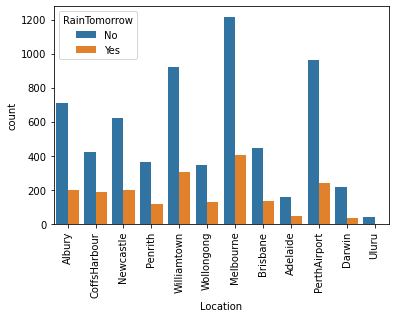

In [18]:
# Location Vs RainTomorrow
sns.countplot(x='Location',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

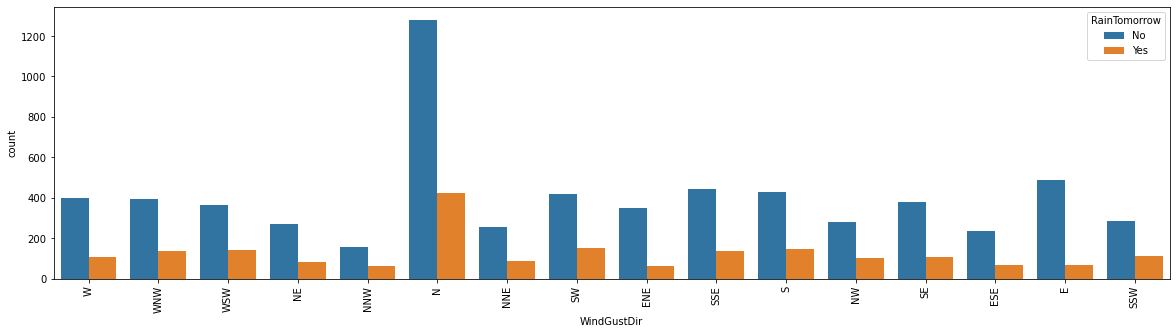

In [19]:
# WindGustDir Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='WindGustDir',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

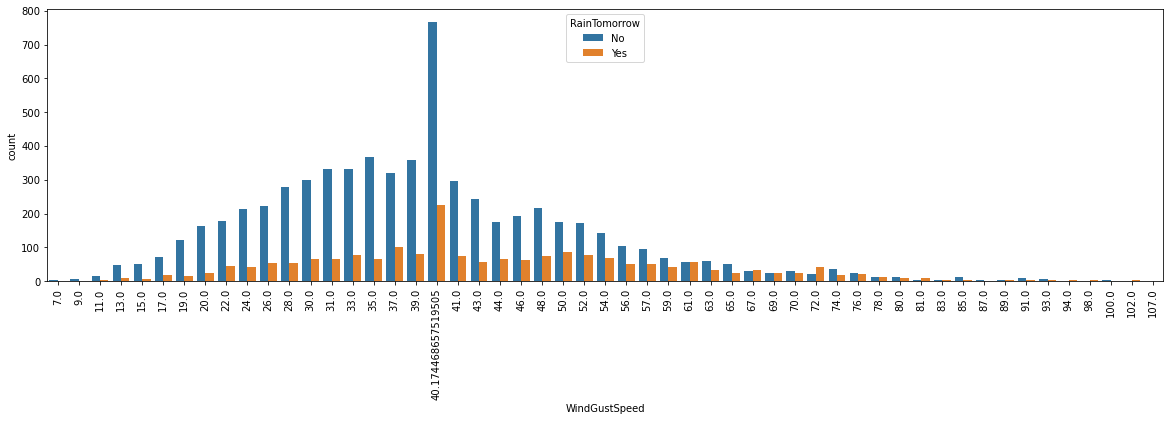

In [20]:
# WindGustSpeed Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='WindGustSpeed',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

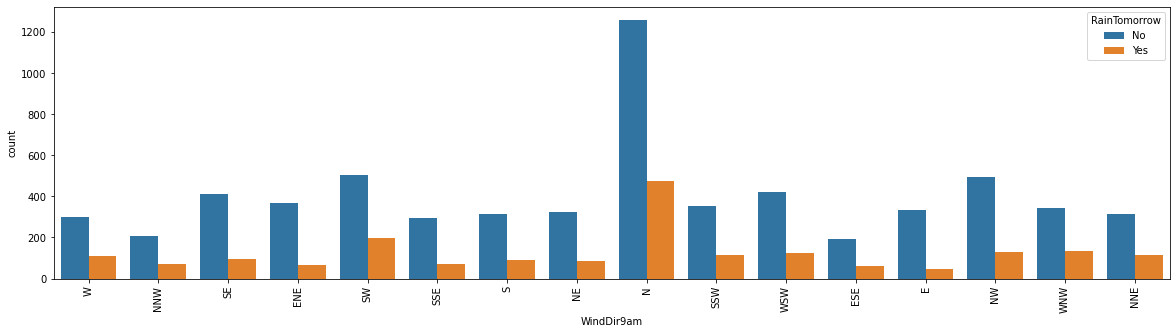

In [21]:
# WindDir9am Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='WindDir9am',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

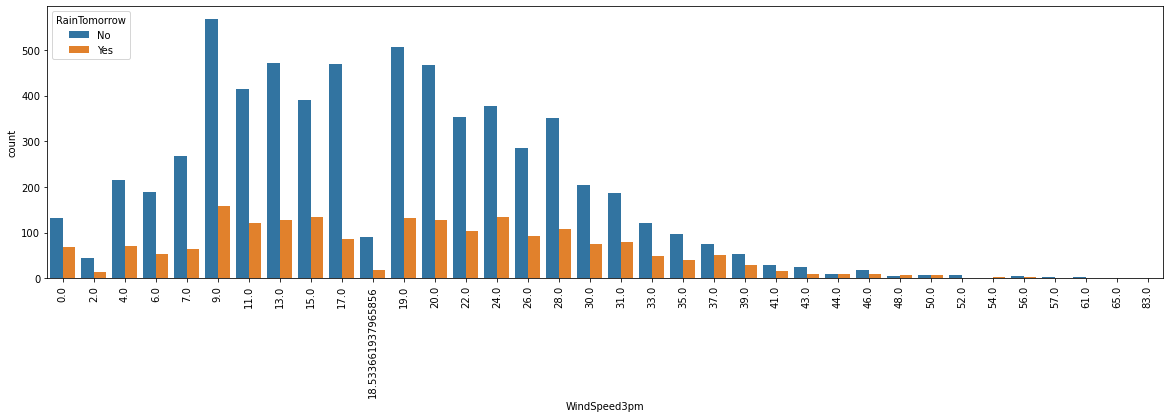

In [22]:
# WindDir3pm Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='WindSpeed3pm',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

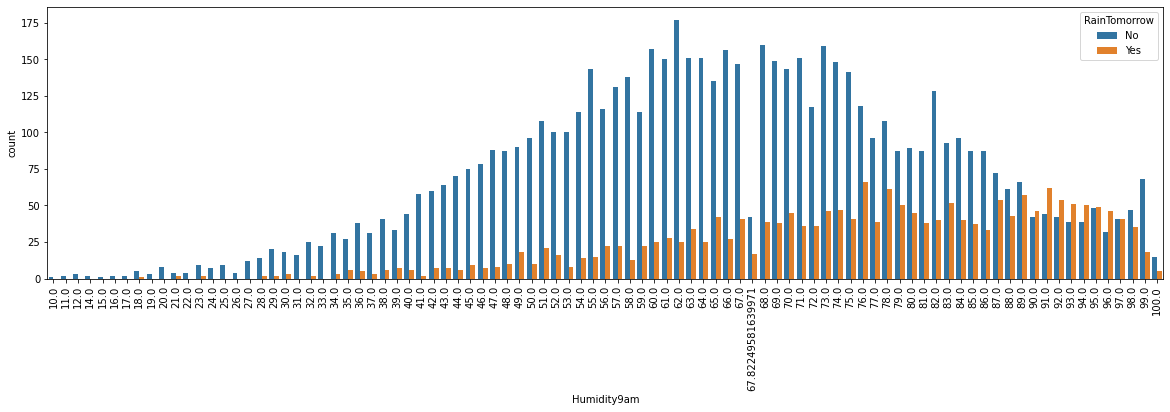

In [23]:
# Humidity9am Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='Humidity9am',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

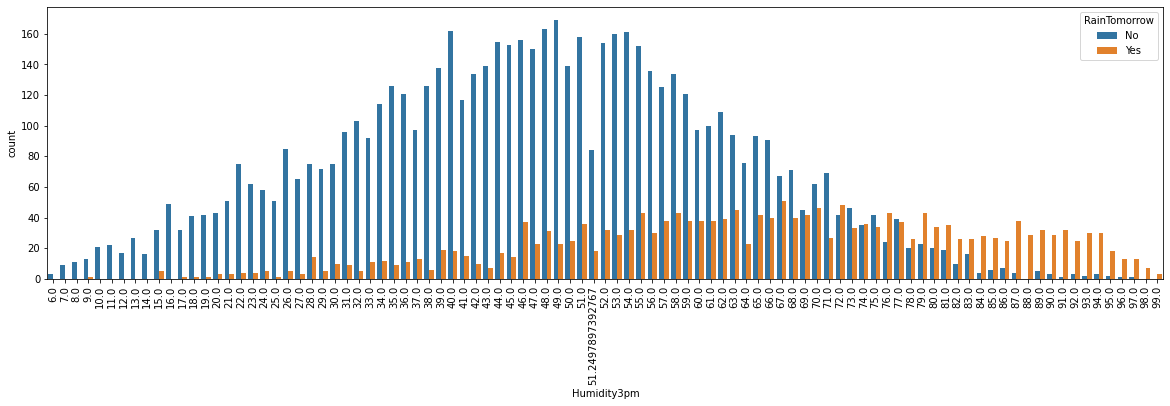

In [24]:
# Humidity3pm Vs RainTomorrow
plt.figure(figsize=(20,5))
sns.countplot(x='Humidity3pm',data=rain,hue='RainTomorrow')
plt.xticks(rotation=90)
plt.show

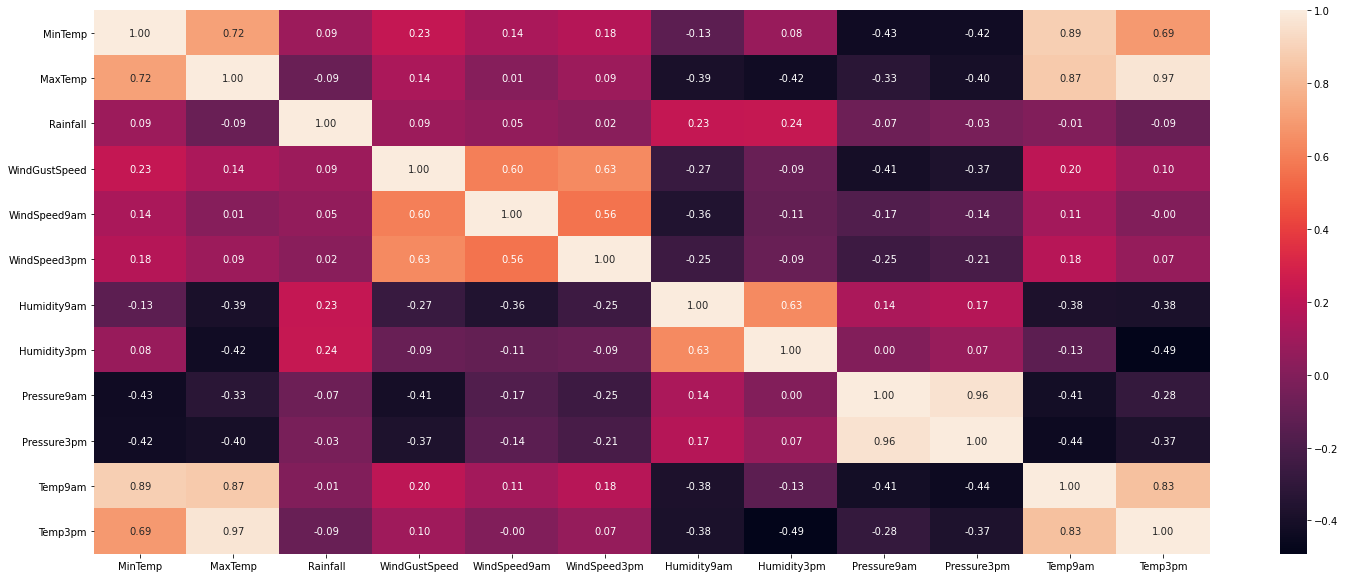

In [25]:
# Correlation matrix
plt.figure(figsize = (25,10))
sns.heatmap(rain.corr(),annot = True,fmt='0.2f')
plt.show()

#### From correlation matrix we can observe one thing that is MinTemp,MaxTemp are correlated with each other.at the same time Temp9am,Tem3pm,pressure9am,pressure3pm are internally corelated with each other 

In [26]:
#
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [27]:
rain['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [28]:
# categori ,numeri Let us encode the data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for column in rain.columns:
        rain[column] = le.fit_transform(rain[column])
rain
       

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,0.6,13,44.000000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.100000,0.0,14,44.000000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.700000,0.0,15,46.000000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.000000,0.0,4,24.000000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.300000,1.0,13,41.000000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,0,31.000000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
8421,9,3.6,25.300000,0.0,6,22.000000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
8422,9,5.4,26.900000,0.0,3,37.000000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
8423,9,7.8,27.000000,0.0,9,28.000000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


In [31]:
#Dividing the feature and target variables
x = rain.drop(columns=['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [32]:
#DataScaling 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)

### Building model

In [33]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

maxAccu =0
maxRs =0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =.20,random_state=i)
    lr = LogisticRegression()  
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu :
        maxAccu =acc
        maxRs =i
print("Best accuracy is:",maxAccu,"On Random state:",maxRs)

pred_lr=lr.predict(x_test)
print("\nAccuracy",accuracy_score(y_test,pred_lr)*100)
print('\n',confusion_matrix(y_test,pred_lr))
print("\nClassification Report:\n",classification_report(y_test,pred_lr))
print("")


Best accuracy is: 0.8557863501483679 On Random state: 81

Accuracy 83.26409495548961

 [[1225   67]
 [ 215  178]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1292
           1       0.73      0.45      0.56       393

    accuracy                           0.83      1685
   macro avg       0.79      0.70      0.73      1685
weighted avg       0.82      0.83      0.82      1685




In [35]:
#cross_validation for LogisticRegression
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.820181570739047


In [36]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.25,random_state=81)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('\n',confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 84.26966292134831

 [[4557  274]
 [ 720  768]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4831
           1       0.74      0.52      0.61      1488

    accuracy                           0.84      6319
   macro avg       0.80      0.73      0.75      6319
weighted avg       0.83      0.84      0.83      6319



In [37]:
#Tunning the parameter using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.25,random_state=14)

clf = RandomForestClassifier()

params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
grd = GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params= >',grd.best_params_)

#RandomForest Classifier

clf = grd.best_estimator_

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)

print("\n Accuracy RandomForest Normal===>",accuracy_score(y_test,y_pred))
print("\n Confusion_mat:",'\n',rf_conf_mat)
print('\n')
report =classification_report(y_test,y_pred)
print(report)

best_params= > {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}

 Accuracy RandomForest Normal===> 0.8377907896819117

 Confusion_mat: 
 [[4607  208]
 [ 817  687]]


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4815
           1       0.77      0.46      0.57      1504

    accuracy                           0.84      6319
   macro avg       0.81      0.71      0.74      6319
weighted avg       0.83      0.84      0.82      6319



In [38]:
#cross_validation for RandomForest
from sklearn.model_selection import cross_val_score

crv = cross_val_score(clf,x,y,cv=10)
print("Cross validation score of LogisticRegression Model",crv.mean())

Cross validation score of LogisticRegression Model 0.861491168009287


In [39]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('\n',confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 78.28770375059345

 [[4087  728]
 [ 644  860]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4815
           1       0.54      0.57      0.56      1504

    accuracy                           0.78      6319
   macro avg       0.70      0.71      0.71      6319
weighted avg       0.79      0.78      0.78      6319



In [40]:
#cross_validation for DecisionTree

crv = cross_val_score(dt,x,y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.8420296531728388


In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print('\n',confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 81.16790631429024

 [[4530  285]
 [ 905  599]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4815
           1       0.68      0.40      0.50      1504

    accuracy                           0.81      6319
   macro avg       0.76      0.67      0.69      6319
weighted avg       0.80      0.81      0.79      6319



In [42]:
#cross_validation for DecisionTree

crv = cross_val_score(knn,x,y,cv=10)
print("Cross validation score of DecisionTree Model",crv.mean())

Cross validation score of DecisionTree Model 0.8152013367032682


### From the model building i observed one thing that Accuracy score and CV score are
##### For LogisticRegression Accuracyscore is : 85% and CV Score:82%
##### for RandomForest Accuracyscore is : 84% and CV Score:86%
##### For Decision Tree Accuracyscore is : 78% and CV Score:84%
##### For KNN Accuracyscore is: 81% and CV Score:81.5%
##### So,from the result RandomForestClassifier giving the best results 

In [43]:
#AUC_ROC_CURve
pred_prob_lr = lr.predict_proba(x_test)
pred_prob_dt = dt.predict_proba(x_test)
pred_prob_clf= clf.predict_proba(x_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr_clf, tpr_clf, thresh_clf = roc_curve(y_test, pred_prob_clf[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score_lr = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score_dt = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score_clf = roc_auc_score(y_test, pred_prob_clf[:,1])


print("AUC_score for linearRegression :",auc_score_lr, "\n AUC_score for DecisionTree Classifier:",auc_score_dt,
      "\n AUC_score for RandomForestClassifier:",auc_score_clf)

AUC_score for linearRegression : 0.8424535610127925 
 AUC_score for DecisionTree Classifier: 0.7103071628996266 
 AUC_score for RandomForestClassifier: 0.8558958733788471


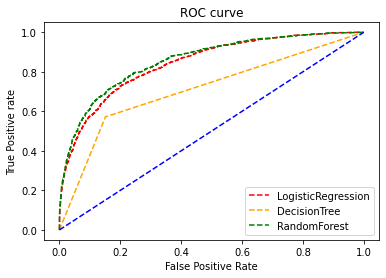

In [44]:
# plot roc curves
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='LogisticRegression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='DecisionTree')
plt.plot(fpr_clf, tpr_clf, linestyle='--',color='green', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

##### From the curve im observe that logisticRegression and Randomforest are almost same.

In [45]:
#saving the model
import joblib
joblib.dump(rf,"rainfall_prediction.pkl")

['rainfall_prediction.pkl']

# Regression model:Predicting the Rainfall


In [46]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


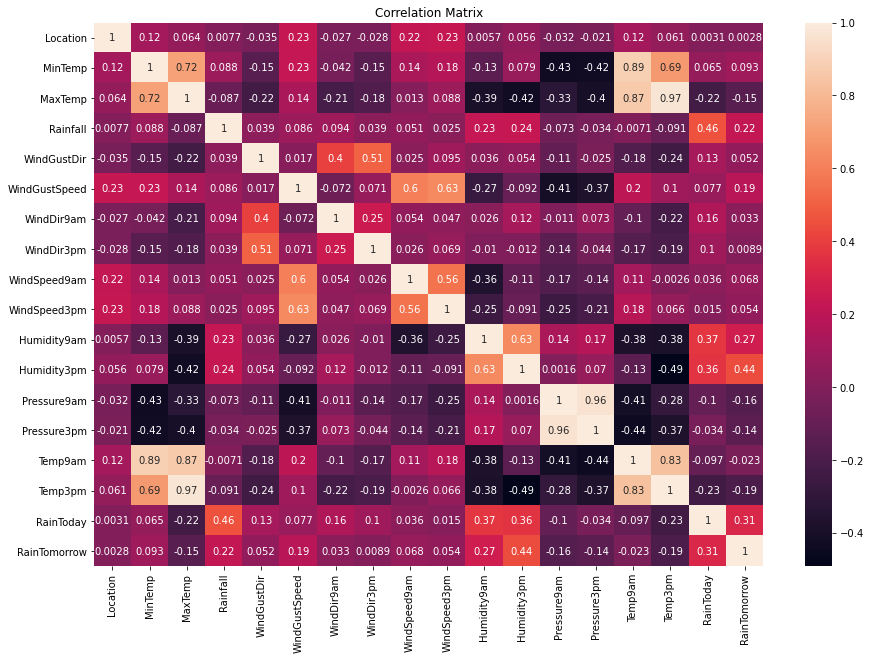

In [56]:
#Correlation matric
plt.figure(figsize = (15,10))
sns.heatmap(rain.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [47]:
#dividing the feature and target variables
xr = rain.drop('Rainfall',axis=1)
yr = rain['Rainfall']

In [54]:
xr.shape

(8425, 17)

In [55]:
yr.shape

(8425,)

In [57]:
#DataScaling 
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
xr = mms.fit_transform(xr)

#### BuildingModel

In [58]:
#traing the model
from sklearn.model_selection import train_test_split,GridSearchCV

xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.2)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


lr = LinearRegression()

train = []
test = []
    
for i in range(0,100):
    xr_train,xr_test,yr_train,yr_test = train_test_split(xr,yr,test_size=0.2,random_state=i)
    lr.fit(xr_train,yr_train)
    pred_train = lr.predict(xr_train)
    pred_test = lr.predict(xr_test)
        
    train.append(r2_score(yr_train,pred_train))
    test.append(r2_score(yr_test,pred_test))

data = pd.DataFrame({'Train':train,
                    'Test':test})
data

,Train,Test
0,0.221388,0.295029
1,0.235025,0.226958
2,0.255340,0.178343
3,0.239288,0.211919
4,0.225373,0.286953
...,...,...
95,0.261262,0.162266
96,0.234830,0.229280
97,0.229322,0.249139
98,0.222266,0.300220


In [63]:
#RandomForestRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor()

rf.fit(xr_train,yr_train)
rf.score(xr_train,yr_train)
pred_r = rf.predict(xr_test)

rfs = r2_score(yr_test,pred_r)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(yr_test,pred_r))
print("mean_squared_error",mean_squared_error(yr_test,pred_r))
print('RMSE:', np.sqrt(mean_squared_error(yr_test, pred_r)))

R2score 32.372871964414465


Mean_absolute_error: 1.8241680730948384
mean_squared_error 36.18996382652314
RMSE: 6.0158094905443225


In [65]:
#RandomForestRegressor
parameters = {'criterion':['mse','mac'],
             'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xr_train,yr_train)

print(clf.best_params_)

rf = RandomForestRegressor(criterion = 'mse',max_features='auto')
rf.fit(xr_train,yr_train)
rf.score(xr_train,yr_train)
pred_r = rf.predict(xr_test)

rfs = r2_score(yr_test,pred_r)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(yr_test,pred_r))
print("mean_squared_error",mean_squared_error(yr_test,pred_r))
print('RMSE:', np.sqrt(mean_squared_error(yr_test, pred_r)))

{'criterion': 'mse', 'max_features': 'sqrt'}
R2score 24.74306398967554


Mean_absolute_error: 1.852584010575018
mean_squared_error 40.27297729508007
RMSE: 6.346099376394926


Text(0, 0.5, 'Predicted Y')

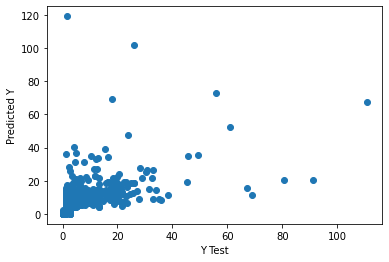

In [67]:
#plotting the resultant 
plt.scatter(x=yr_test,y=pred_r)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
#saving the model
import joblib
joblib.dump(rf,"rainfall_prediction_regression.pkl")

['rainfall_prediction_regression.pkl']